In [1]:
import sys
!{sys.executable} -m pip install --user -q -q -e ../

In [3]:
from mobitic_utils.db import import_gpd_from_sql
import matplotlib.pyplot as plt
from mobitic_utils.maps import cmap

## Maps of results

In [4]:
sql = 'with data as ( \
select p."0-3" as cancan, p.filosofi as filosofi, g.geometry as geometry, p."x-y" as "x-y" \
from total_population p, grille g \
where p."x-y" = g."x-y" and p.week in (12,13,14) ) \
select \
    AVG(filosofi) as filosofi, AVG(cancan) as cancan, geometry,"x-y" \
from data \
group by geometry, "x-y"'
total = import_gpd_from_sql(sql)
total.head(2)

,filosofi,cancan,geometry,x-y
0,45.556641,50.146566,"POLYGON ((124800.000 2432000.000, 128000.000 2...",126400.0-2430400.0
1,213.916016,151.626021,"POLYGON ((124800.000 2428800.000, 128000.000 2...",126400.0-2427200.0


In [5]:
sql = 'with data as ( \
select p."0-15" as cancan, jrc.population as jrc, g.geometry as geometry, p."x-y" as "x-y" \
from total_population p, grille g, jrc \
where p."x-y" = g."x-y" and p.week in (12,13,14) and jrc."x-y"=p."x-y" and jrc.month = \'3\' and jrc.day_night=\'D\') \
select \
    AVG(jrc) as jrc, AVG(cancan) as cancan_day, geometry, "x-y" \
from data \
group by geometry, "x-y"'
total_day = import_gpd_from_sql(sql)
total_day.head()

,jrc,cancan_day,geometry,x-y
0,35.702044,47.642460,"POLYGON ((124800.000 2432000.000, 128000.000 2...",126400.0-2430400.0
1,202.990043,147.822331,"POLYGON ((124800.000 2428800.000, 128000.000 2...",126400.0-2427200.0
2,76.911201,98.499203,"POLYGON ((121600.000 2428800.000, 124800.000 2...",123200.0-2427200.0
3,35.425409,3.582960,"POLYGON ((123200.000 2432000.000, 124800.000 2...",124000.0-2431200.0
4,65.949591,101.282873,"POLYGON ((123200.000 2430400.000, 124800.000 2...",124000.0-2429600.0


In [6]:
import math
total.filosofi = total.filosofi.apply(math.log)
total.cancan = total.cancan.apply(math.log)
total.filosofi = total.filosofi.fillna(0)

In [7]:
total_day.jrc = total_day.jrc.apply(math.log)
total_day.cancan_day = total_day.cancan_day.apply(math.log)
total_day.jrc = total_day.jrc.fillna(0)
total_day.head()

,jrc,cancan_day,geometry,x-y
0,3.575208,3.863724,"POLYGON ((124800.000 2432000.000, 128000.000 2...",126400.0-2430400.0
1,5.313157,4.996011,"POLYGON ((124800.000 2428800.000, 128000.000 2...",126400.0-2427200.0
2,4.342652,4.590048,"POLYGON ((121600.000 2428800.000, 124800.000 2...",123200.0-2427200.0
3,3.567429,1.276189,"POLYGON ((123200.000 2432000.000, 124800.000 2...",124000.0-2431200.0
4,4.188891,4.617917,"POLYGON ((123200.000 2430400.000, 124800.000 2...",124000.0-2429600.0


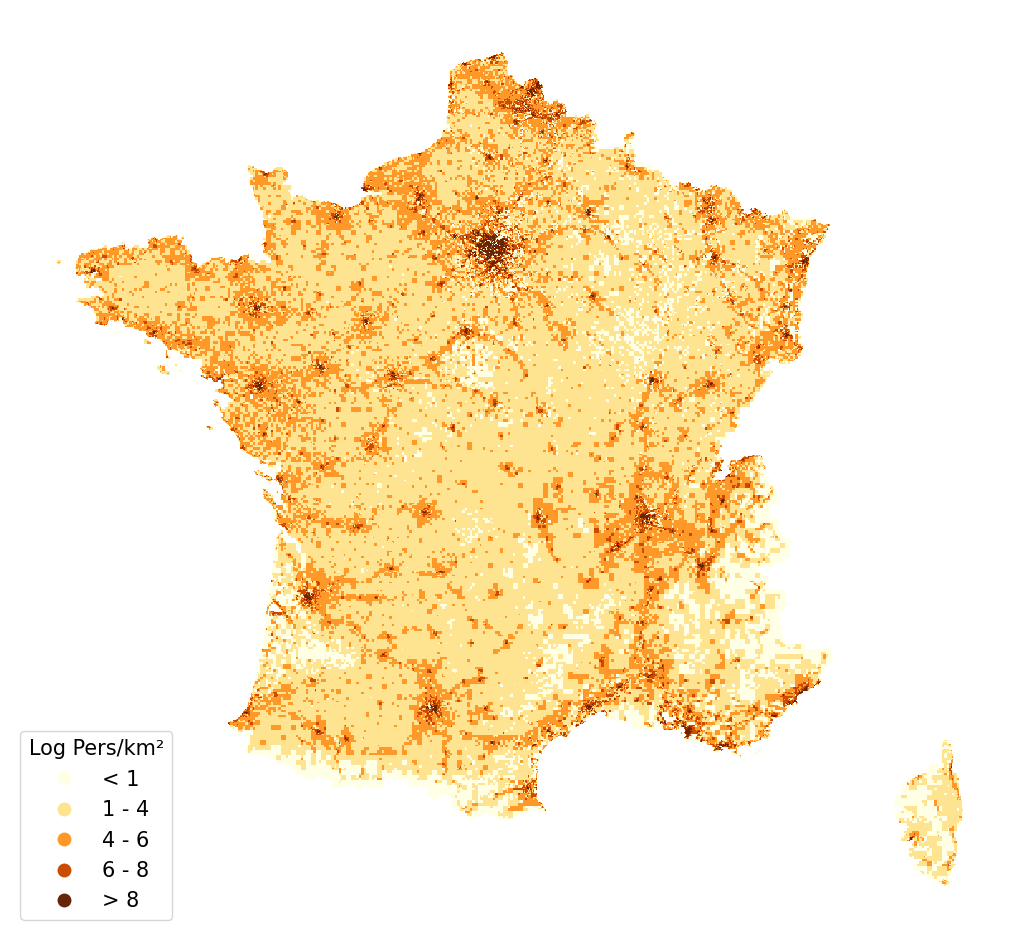

In [8]:
bins = [1, 4, 6 , 8, 100000]
cmap(total, "filosofi", bins = bins, cmap_col= 'YlOrBr', title_leg = 'Log Pers/km²', png = 'filo.png')

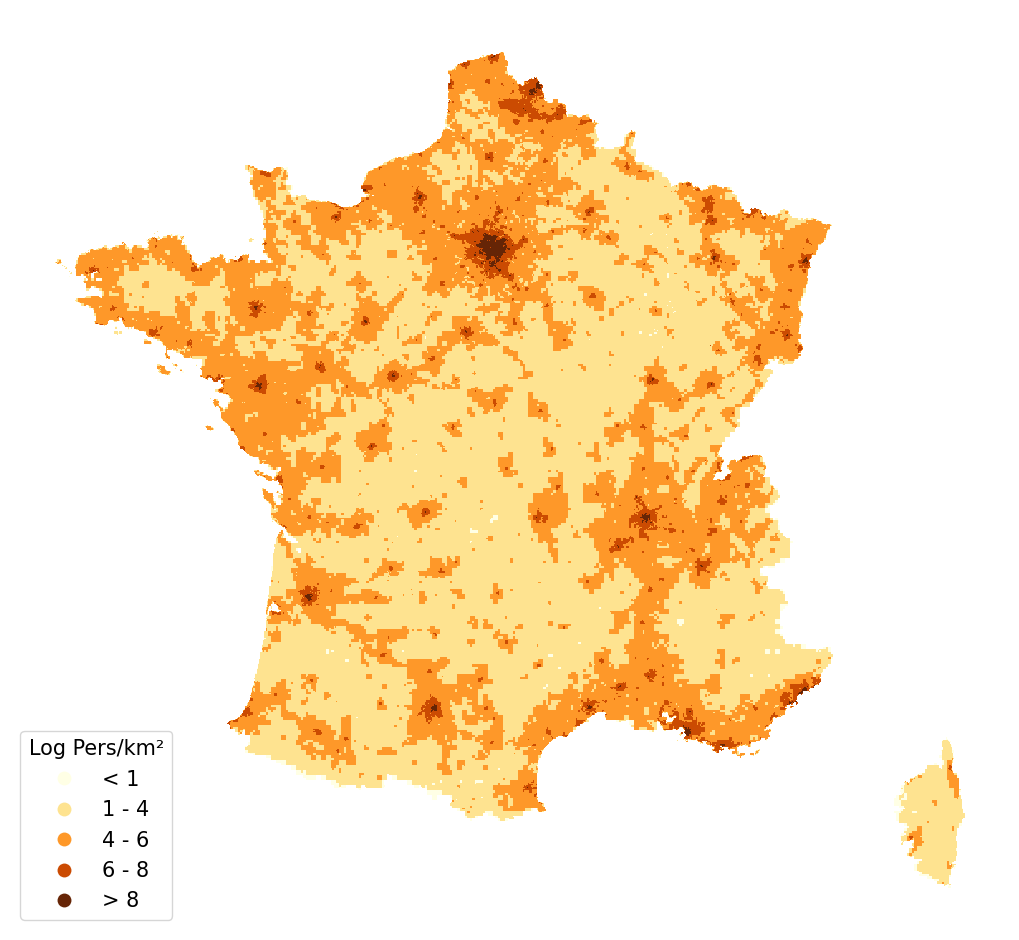

In [9]:
bins = [1, 4, 6 , 8, 100000]
cmap(total, "cancan", bins = bins, cmap_col= 'YlOrBr', title_leg = 'Log Pers/km²', png = 'cancan.png')

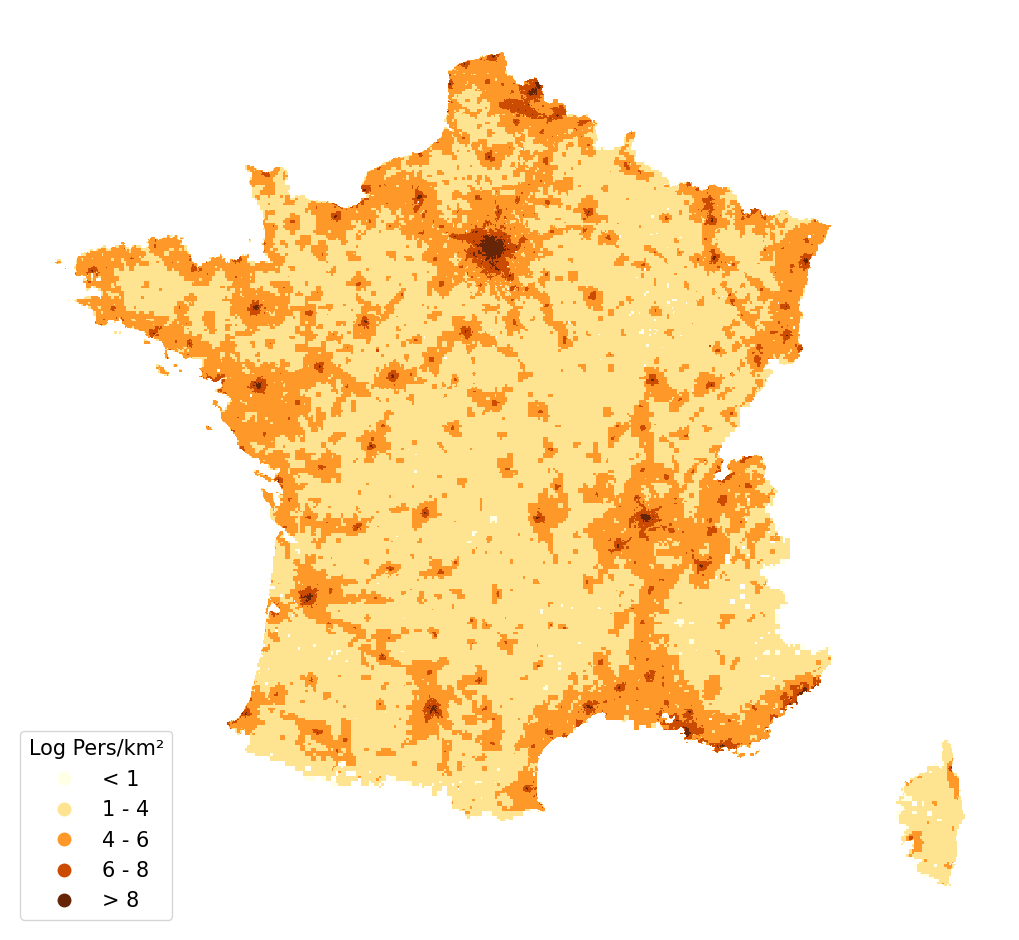

In [10]:
bins = [1, 4, 6 , 8, 100000]
cmap(total_day, "cancan_day", bins = bins, cmap_col= 'YlOrBr', title_leg = 'Log Pers/km²', png = 'cancan_day.png')

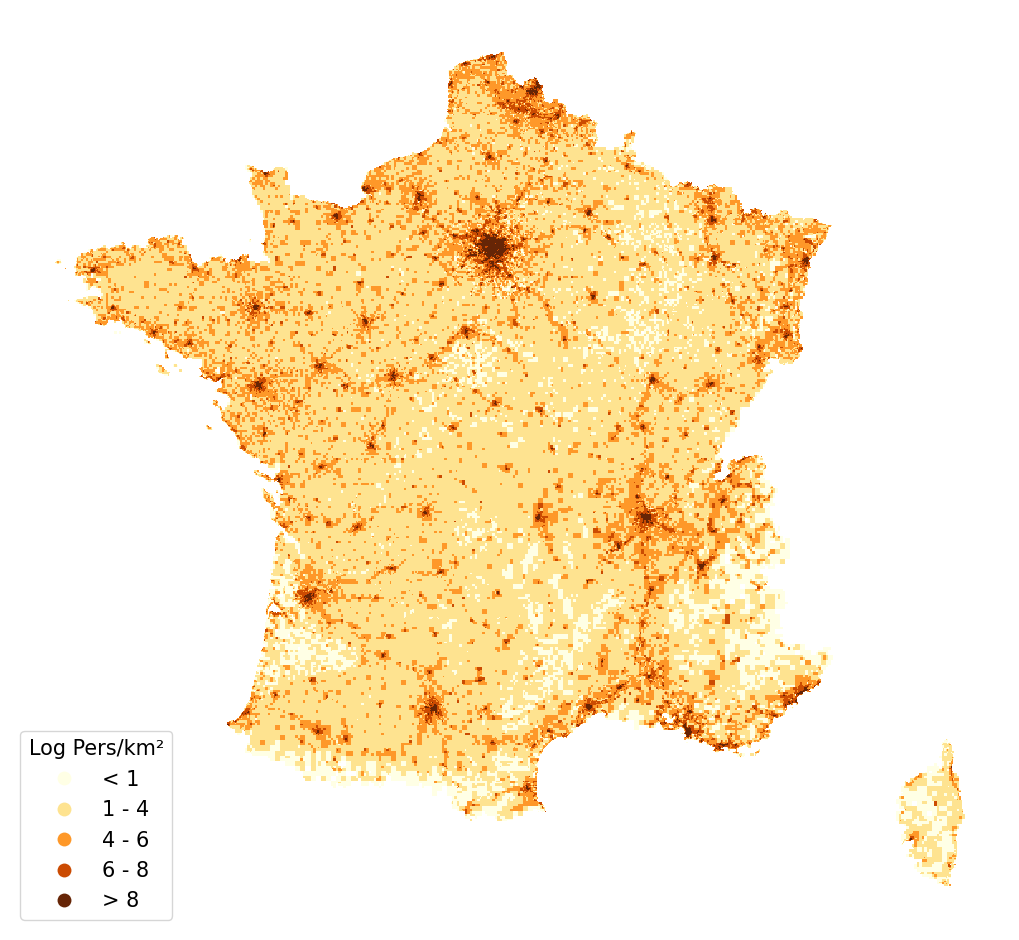

In [11]:
bins = [1, 4, 6 , 8, 100000]
cmap(total_day, "jrc", bins = bins, cmap_col= 'YlOrBr', title_leg = 'Log Pers/km²', png = 'jrc.png')

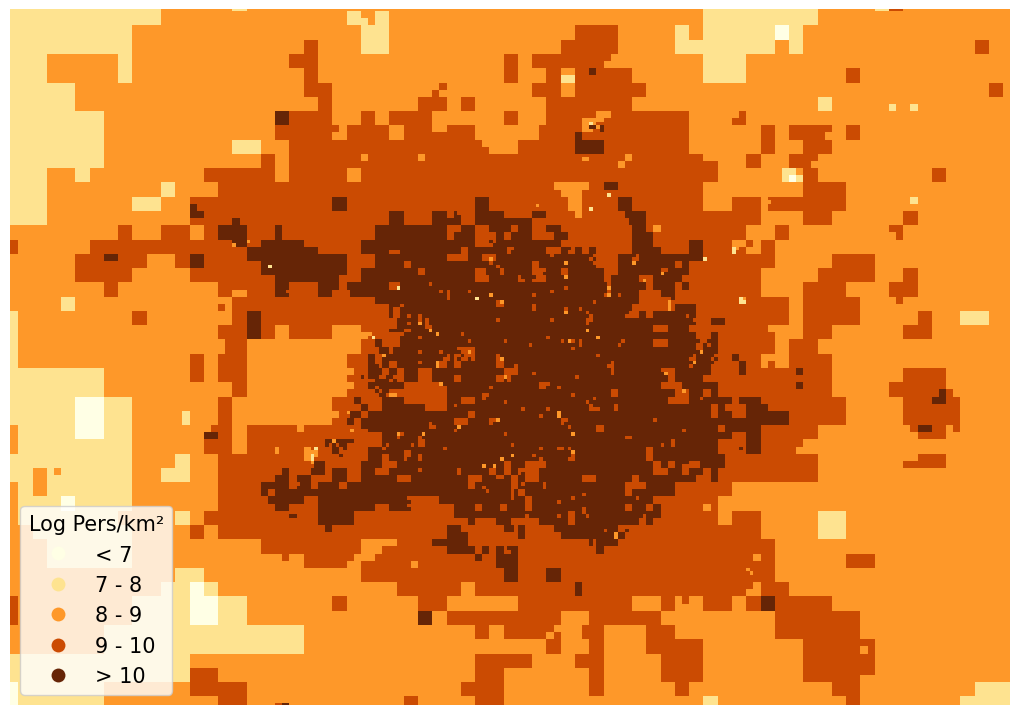

In [12]:
bins = [7,8,9,10, 10000]
cmap(total_day.cx[585368:613390, 2420157:2439660], "cancan_day", cmap_col= 'YlOrBr', title_leg = 'Log Pers/km²', png = 'cancan_day_paris.png',bins = bins, xlim =(585368,613390), ylim = (2420157,2439660) )

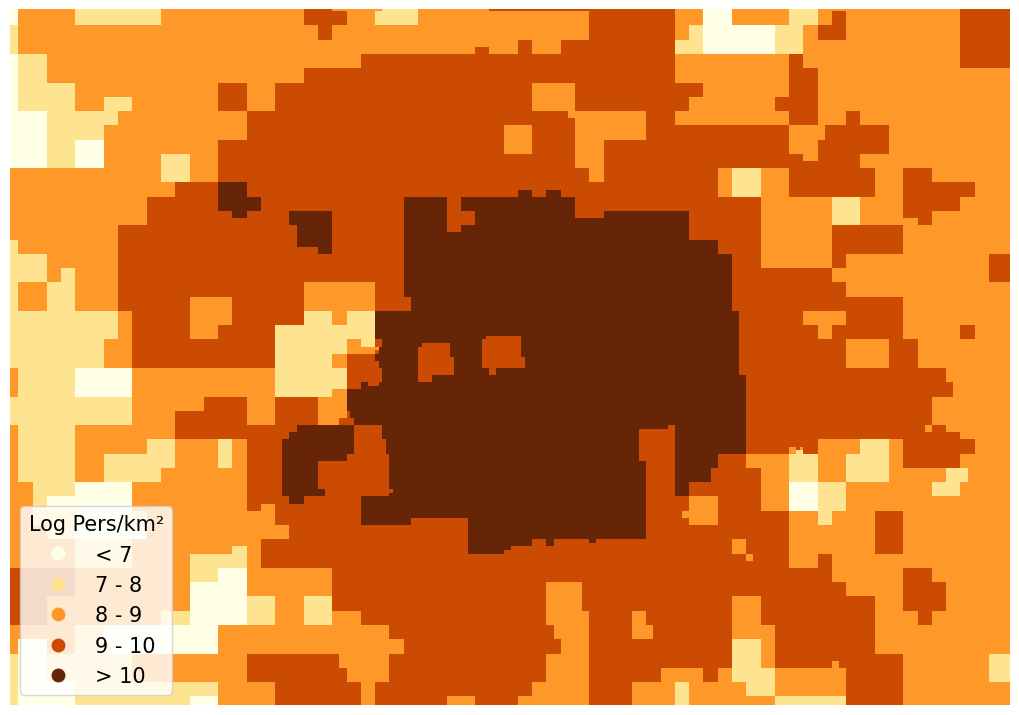

In [13]:
bins  = [7,8,9,10, 10000]
cmap(total_day.cx[585368:613390, 2420157:2439660], "jrc", title_leg = 'Log Pers/km²', png = 'jrc_day_paris_grid.png', cmap_col= 'YlOrBr',bins = bins, xlim =(585368,613390), ylim = (2420157,2439660) )

In [14]:
import math
sql = f"""select population as jrc, geometry from original_jrc o where o.time = 'D' and o.month = '3'"""
jrc_original = import_gpd_from_sql(sql)
jrc_original['jrc'] = jrc_original.jrc.apply(math.log)
sql = f"""select population as jrc, geometry from original_jrc o where o.time = 'N' and o.month = '3'"""
jrc_original_night = import_gpd_from_sql(sql)
jrc_original_night['jrc'] = jrc_original_night.jrc.apply(math.log)

In [15]:
jrc_original.crs

<Derived Projected CRS: EPSG:27572>
Name: NTF (Paris) / Lambert zone II
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France mainland onshore between 50.5 grads and 53.5 grads North (45°27'N to 48°09'N). Also used over all onshore mainland France.
- bounds: (-4.87, 42.33, 8.23, 51.14)
Coordinate Operation:
- name: Lambert zone II
- method: Lambert Conic Conformal (1SP)
Datum: Nouvelle Triangulation Francaise (Paris)
- Ellipsoid: Clarke 1880 (IGN)
- Prime Meridian: Paris

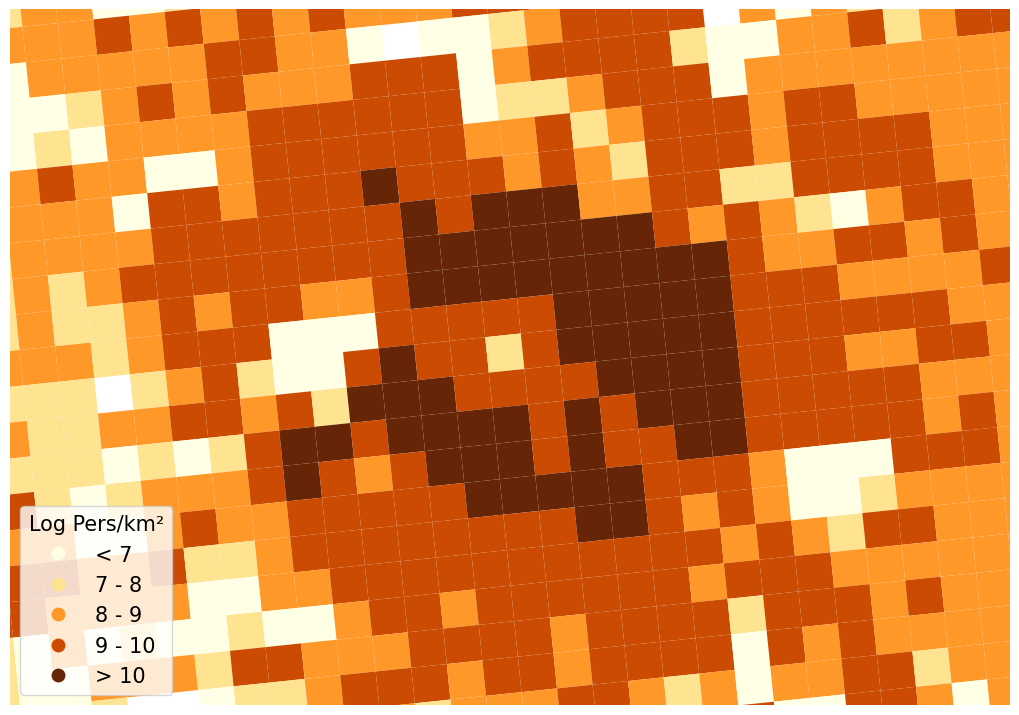

In [16]:
bins  = [7,8,9,10, 10000]
cmap(jrc_original_night.cx[585368:613390, 2420157:2439660], "jrc", title_leg = 'Log Pers/km²',  cmap_col= 'YlOrBr',bins = bins, png = 'jrc_paris_night.png', xlim =(585368,613390), ylim = (2420157,2439660) )

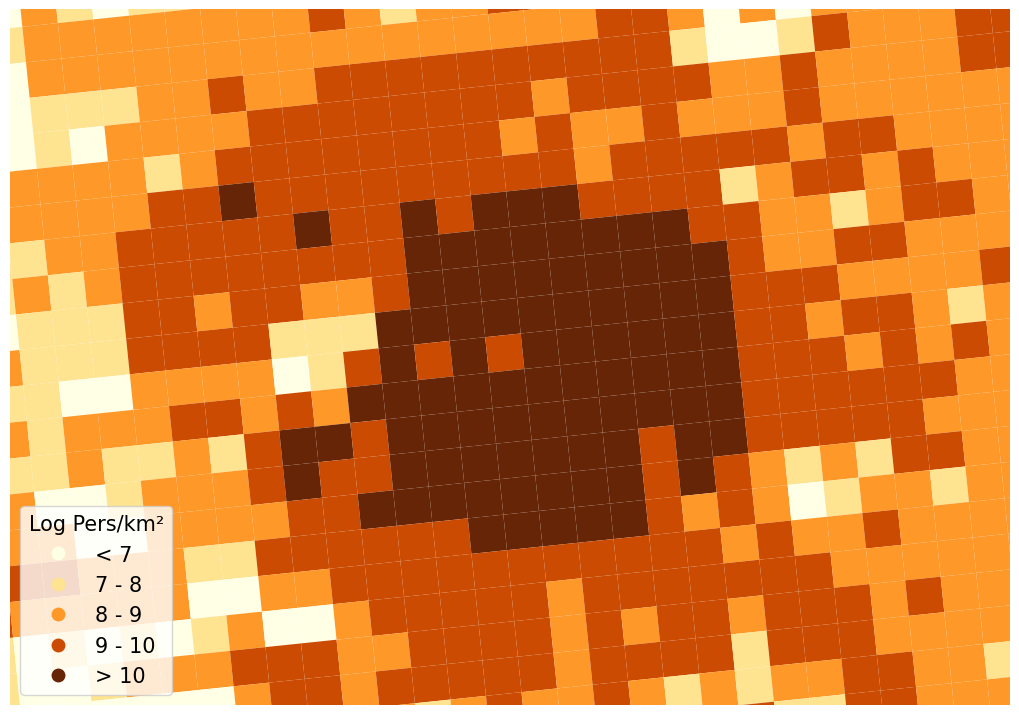

In [17]:
bins  = [7,8,9,10, 10000]
cmap(jrc_original.cx[585368:613390, 2420157:2439660], "jrc", title_leg = 'Log Pers/km²',  cmap_col= 'YlOrBr',bins = bins, png = 'jrc_paris.png', xlim =(585368,613390), ylim = (2420157,2439660) )

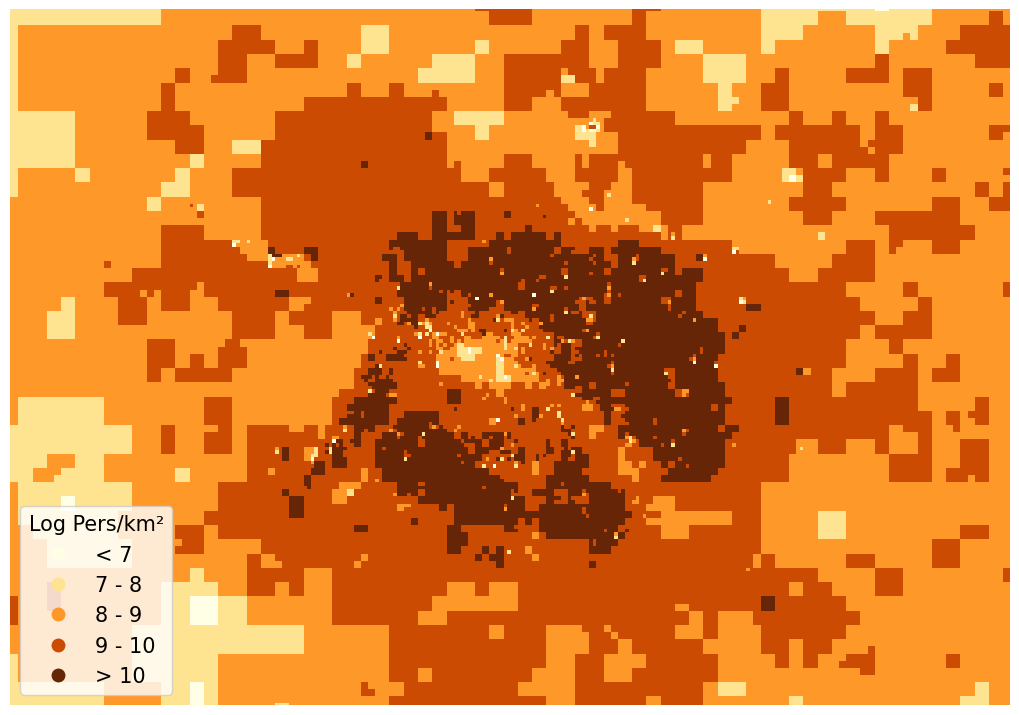

In [18]:
bins  = [7,8,9,10, 10000]
cmap(total.cx[585368:613390, 2420157:2439660], "cancan",  cmap_col= 'YlOrBr', title_leg = 'Log Pers/km²', png = 'cancan_paris.png',bins = bins, xlim =(585368,613390), ylim = (2420157,2439660) )

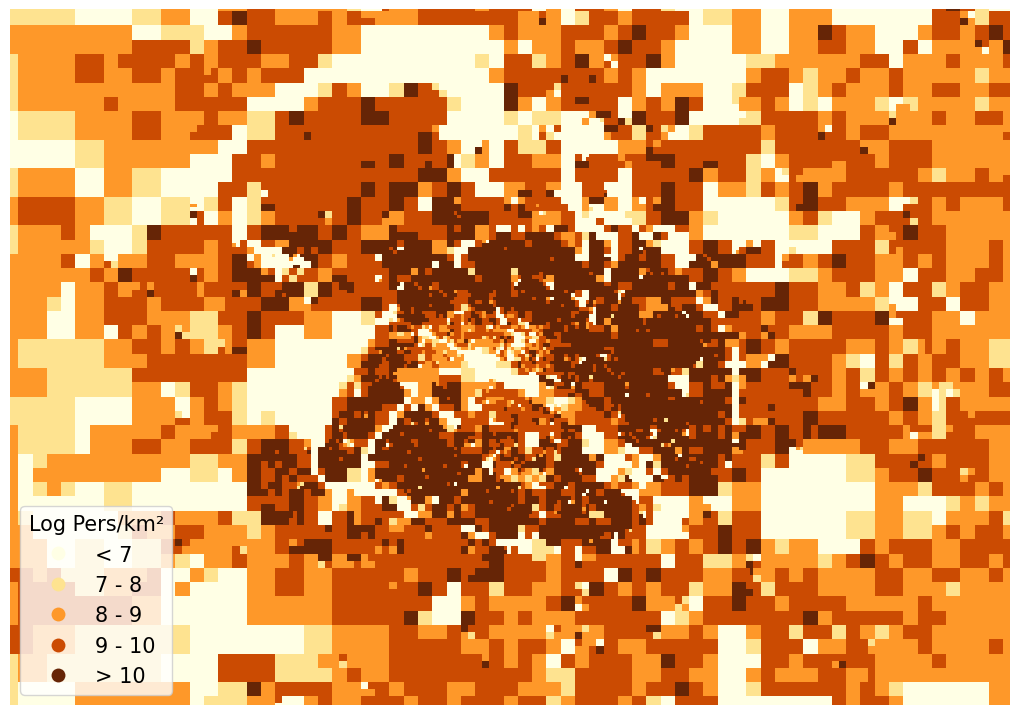

In [19]:
bins = [7,8,9,10, 10000]
cmap(total.cx[585368:613390, 2420157:2439660], "filosofi",  cmap_col= 'YlOrBr', title_leg = 'Log Pers/km²', png = 'filosofi_paris.png',bins = bins, xlim =(585368,613390), ylim = (2420157,2439660) )

In [20]:
!pip install -q -q -q matplotlib_scalebar

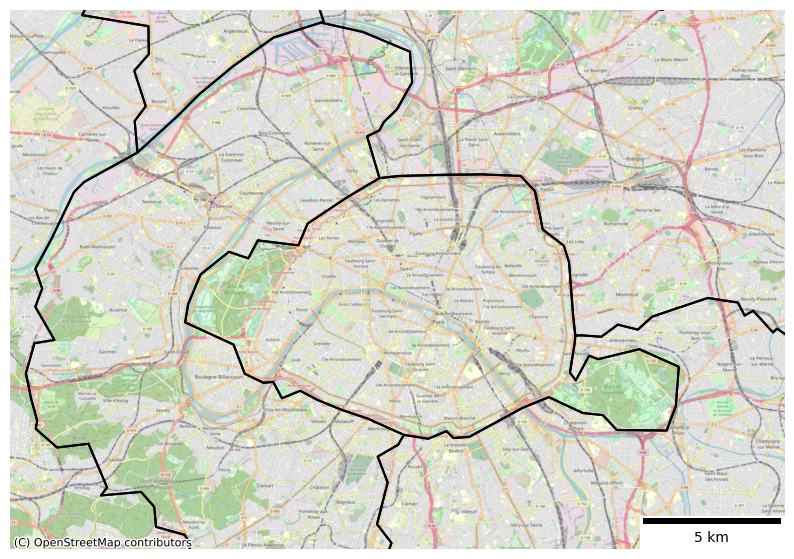

In [21]:
import contextily as ctx
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
sql = f"""select ST_UNION(aa.geometry) as geometry, aa."DEP" from area_attraction aa GROUP BY aa."DEP" """ 
dep = import_gpd_from_sql(sql)
ax = dep.cx[585368:613390, 2420157:2439660].boundary.plot(figsize = (10,10), color = 'black')
ctx.add_basemap(ax,  zoom=13, crs=dep.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
ax.set_xlim((585368,613390))
ax.set_ylim((2420157,2439660))
ax.add_artist(ScaleBar(1, location='lower right'))
plt.savefig('paris.png')

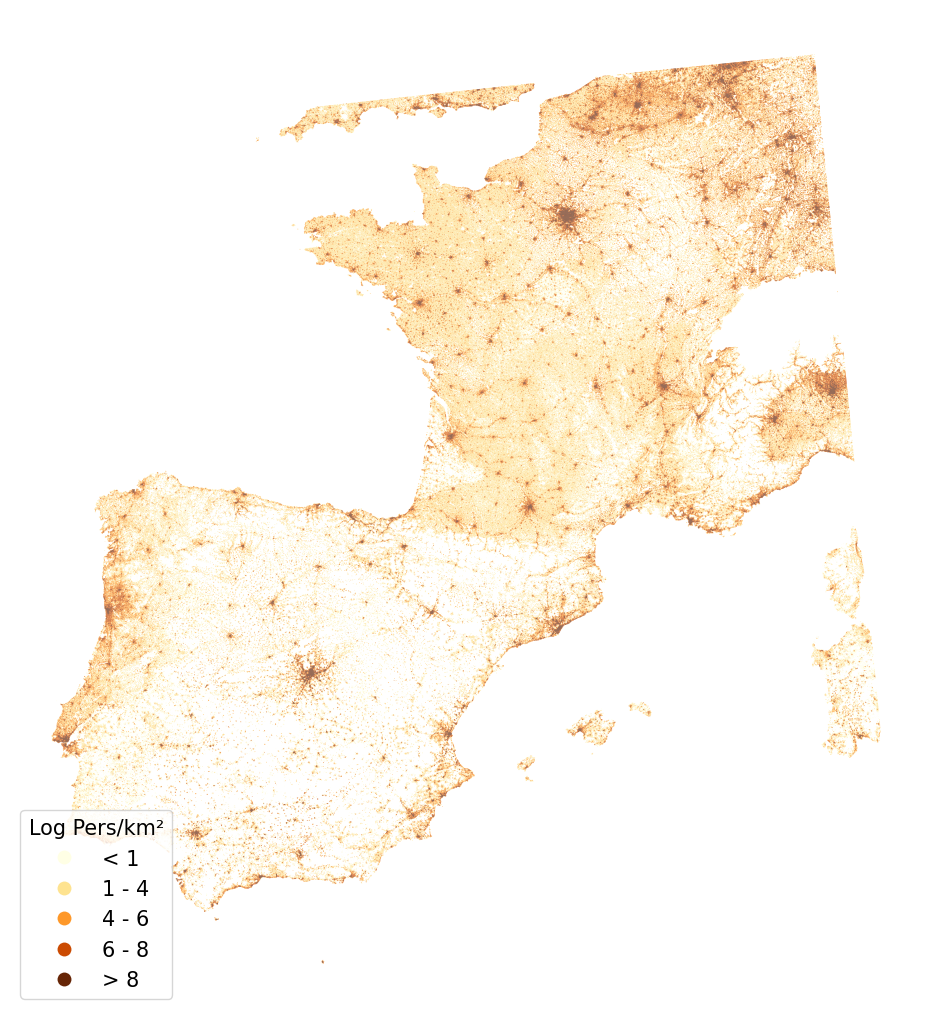

In [22]:
bins = [1, 4, 6 , 8, 100000]
cmap(jrc_original, "jrc", bins = bins, cmap_col= 'YlOrBr', title_leg = 'Log Pers/km²', png = 'jrc_original.png')